In [171]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


## DATA PROCESSING  

In [172]:
df = pd.read_csv('model_data/plotdata.csv',index_col=0,parse_dates=True) #FULL DATA 

In [173]:
df

,Accurate_Episode_Date,mapped_region,CovidCount,Outcome1,long,lat,ICU,ICU_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-01-01,Central,3,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,West,1,0.0,-81.637045,43.169318,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-09,Central,1,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-10,Central,1,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-13,Central,1,0.0,-79.588842,43.621334,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,2021-05-01,Toronto,624,0.0,-79.379358,43.656591,157.0,105.0,354.0,180.0,123.0,23.0,18.0
2115,2021-05-01,West,46,0.0,-81.637045,43.169318,261.0,202.0,561.0,279.0,207.0,18.0,5.0
2116,2021-05-02,East,1,0.0,-76.207778,44.871030,190.0,139.0,457.0,207.0,147.0,17.0,8.0
2117,2021-05-02,Toronto,12,0.0,-79.379358,43.656591,156.0,105.0,337.0,180.0,120.0,24.0,15.0


In [174]:
df1 = df.groupby(['Accurate_Episode_Date']).sum().reset_index()

In [175]:
df1 = df1.drop(['long','lat','ICU','ICU_vented','icu_former_covid','icu_former_covid_vented'],axis=1)
df1

,Accurate_Episode_Date,CovidCount,Outcome1,hospitalizations,icu_crci_total,icu_crci_total_vented
0,2020-01-01,4,0.0,0.0,0.0,0.0
1,2020-01-09,1,0.0,0.0,0.0,0.0
2,2020-01-10,1,0.0,0.0,0.0,0.0
3,2020-01-13,1,0.0,0.0,0.0,0.0
4,2020-01-16,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
455,2021-04-28,2248,0.0,2281.0,877.0,605.0
456,2021-04-29,1998,1.0,2248.0,884.0,620.0
457,2021-04-30,2144,0.0,2201.0,883.0,632.0
458,2021-05-01,1372,0.0,2152.0,900.0,637.0


In [176]:
df2 = pd.read_csv('Vaccinationdata.csv',index_col=0,parse_dates=True) #Loading in Vaccination data 

In [177]:
df2['report_date']=df2['report_date'].str.split('T',expand=True)[0] #Modifying the date time column 

In [178]:
df2=df2.drop(['total_doses_in_fully_vaccinated_individuals','_id','previous_day_doses_administered'],axis=1)

In [179]:
df2['total_individuals_fully_vaccinated']= df2['total_individuals_fully_vaccinated'].replace(np.nan,0)

In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   report_date                         126 non-null    object 
 1   total_doses_administered            126 non-null    int64  
 2   total_individuals_fully_vaccinated  126 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ KB


In [181]:
df = df1.merge(df2,left_on='Accurate_Episode_Date', right_on='report_date', how='inner') 
#Combining aggregated covid numbers with vaccination numbers 

In [182]:
df['CovidCount']= df['CovidCount'].cumsum()

In [183]:
# df['total_doses_administered']= df['total_doses_administered'] - df['total_doses_administered'].shift(1,fill_value=0)

In [184]:
# df['total_individuals_fully_vaccinated']= df['total_individuals_fully_vaccinated'] - df['total_individuals_fully_vaccinated'].shift(1,fill_value=0)

In [185]:
df = df.drop(['Accurate_Episode_Date'],axis=1)

In [186]:
df['report_date'] =pd.to_datetime(df['report_date'])

In [187]:
df.columns

Index(['CovidCount', 'Outcome1', 'hospitalizations', 'icu_crci_total',
       'icu_crci_total_vented', 'report_date', 'total_doses_administered',
       'total_individuals_fully_vaccinated'],
      dtype='object')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CovidCount                          125 non-null    int64         
 1   Outcome1                            125 non-null    float64       
 2   hospitalizations                    125 non-null    float64       
 3   icu_crci_total                      125 non-null    float64       
 4   icu_crci_total_vented               125 non-null    float64       
 5   report_date                         125 non-null    datetime64[ns]
 6   total_doses_administered            125 non-null    int64         
 7   total_individuals_fully_vaccinated  125 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 8.8 KB


In [189]:
df=df.set_index('report_date')


In [190]:
df= df.iloc[:-1]

In [191]:
df = df.rename(columns={'Outcome1':'Mortality_num'})

In [192]:
df 

,CovidCount,Mortality_num,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
report_date,,,,,,,
2020-12-24,2725,38.0,967.0,297.0,188.0,10756,0.0
2020-12-30,5862,58.0,1230.0,342.0,212.0,18603,0.0
2020-12-31,9104,51.0,1270.0,354.0,219.0,23502,0.0
2021-01-01,12220,57.0,1269.0,355.0,232.0,28887,0.0
2021-01-02,15428,55.0,1287.0,344.0,230.0,33191,0.0
...,...,...,...,...,...,...,...
2021-04-27,271203,0.0,2336.0,875.0,589.0,4791030,362563.0
2021-04-28,273451,0.0,2281.0,877.0,605.0,4907203,365166.0
2021-04-29,275449,1.0,2248.0,884.0,620.0,5027770,368403.0


In [193]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [194]:
df.corr() #Correlation amongst features 

,CovidCount,Mortality_num,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
CovidCount,1.000000,-0.657788,0.471193,0.790762,0.724600,0.966196,0.893153
Mortality_num,-0.657788,1.000000,0.094928,-0.287371,-0.276366,-0.506855,-0.726163
hospitalizations,0.471193,0.094928,1.000000,0.892215,0.910881,0.635916,0.055614
icu_crci_total,0.790762,-0.287371,0.892215,1.000000,0.985380,0.896767,0.458031
icu_crci_total_vented,0.724600,-0.276366,0.910881,0.985380,1.000000,0.832910,0.362372
total_doses_administered,0.966196,-0.506855,0.635916,0.896767,0.832910,1.000000,0.790469
total_individuals_fully_vaccinated,0.893153,-0.726163,0.055614,0.458031,0.362372,0.790469,1.000000


In [195]:
matrix = np.triu(df.corr())

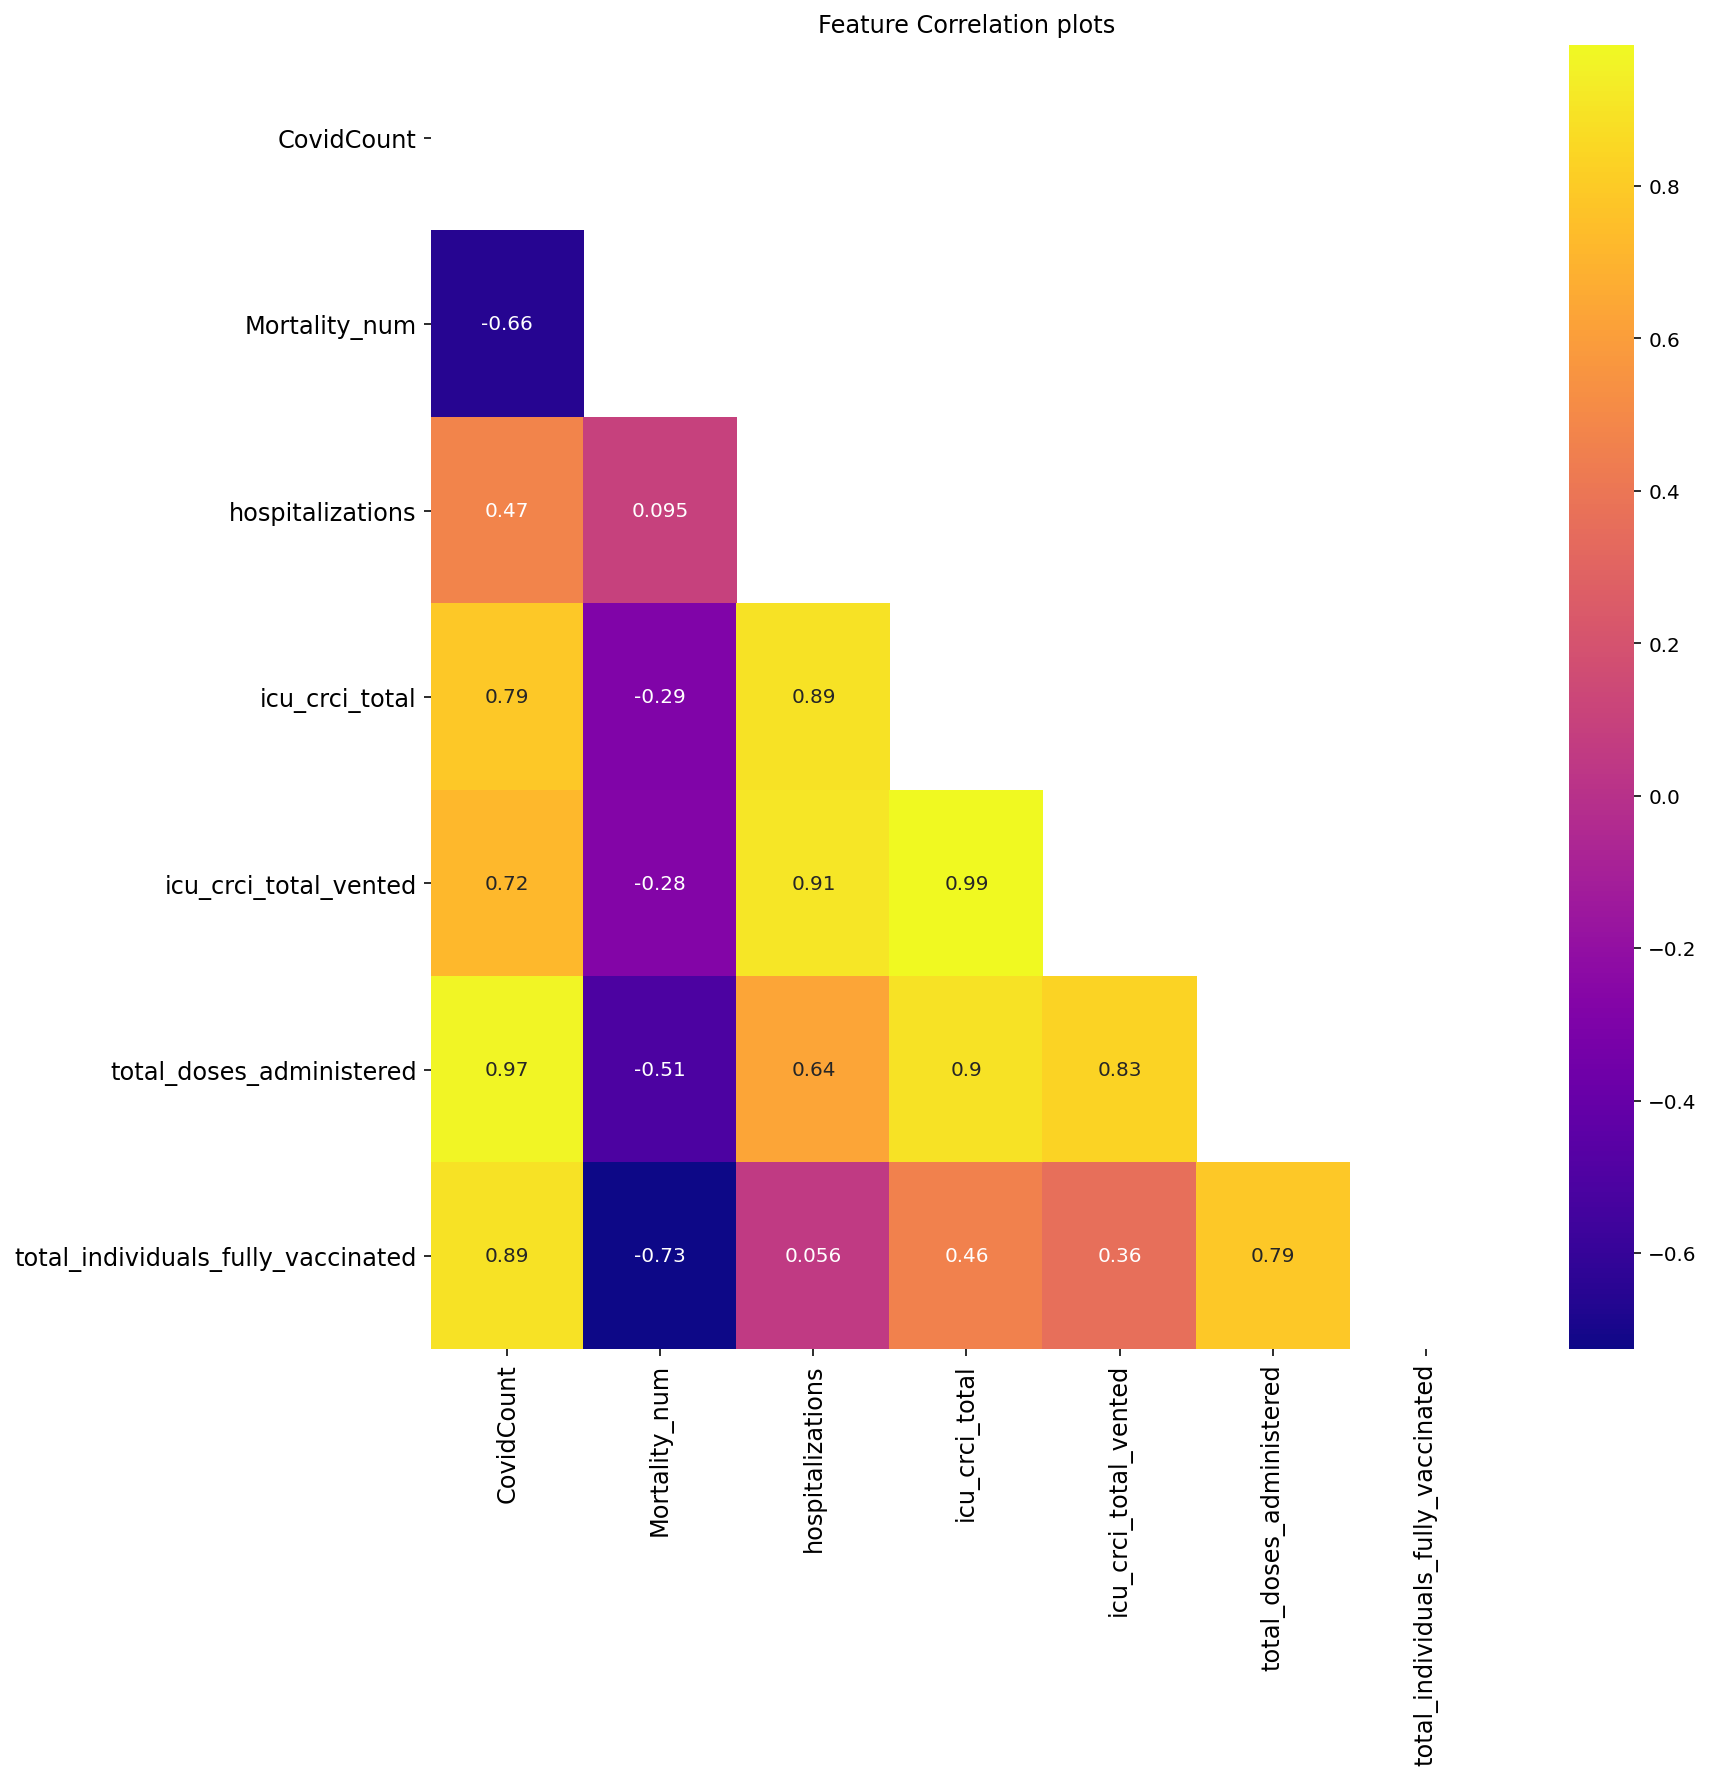

In [196]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),mask=matrix,cmap='plasma',annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Feature Correlation plots')
#plt.savefig('model_data/correlation.png')
plt.show()

## Correlation 

* There is a strong negative correlation between the mortality numbers and the number of people getting vaccinated 
* Similar correlations are observed in other features too 


In [197]:
df = df.drop(['Mortality_num'],axis=1)

In [198]:
df.corr()

,CovidCount,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
CovidCount,1.000000,0.471193,0.790762,0.724600,0.966196,0.893153
hospitalizations,0.471193,1.000000,0.892215,0.910881,0.635916,0.055614
icu_crci_total,0.790762,0.892215,1.000000,0.985380,0.896767,0.458031
icu_crci_total_vented,0.724600,0.910881,0.985380,1.000000,0.832910,0.362372
total_doses_administered,0.966196,0.635916,0.896767,0.832910,1.000000,0.790469
total_individuals_fully_vaccinated,0.893153,0.055614,0.458031,0.362372,0.790469,1.000000


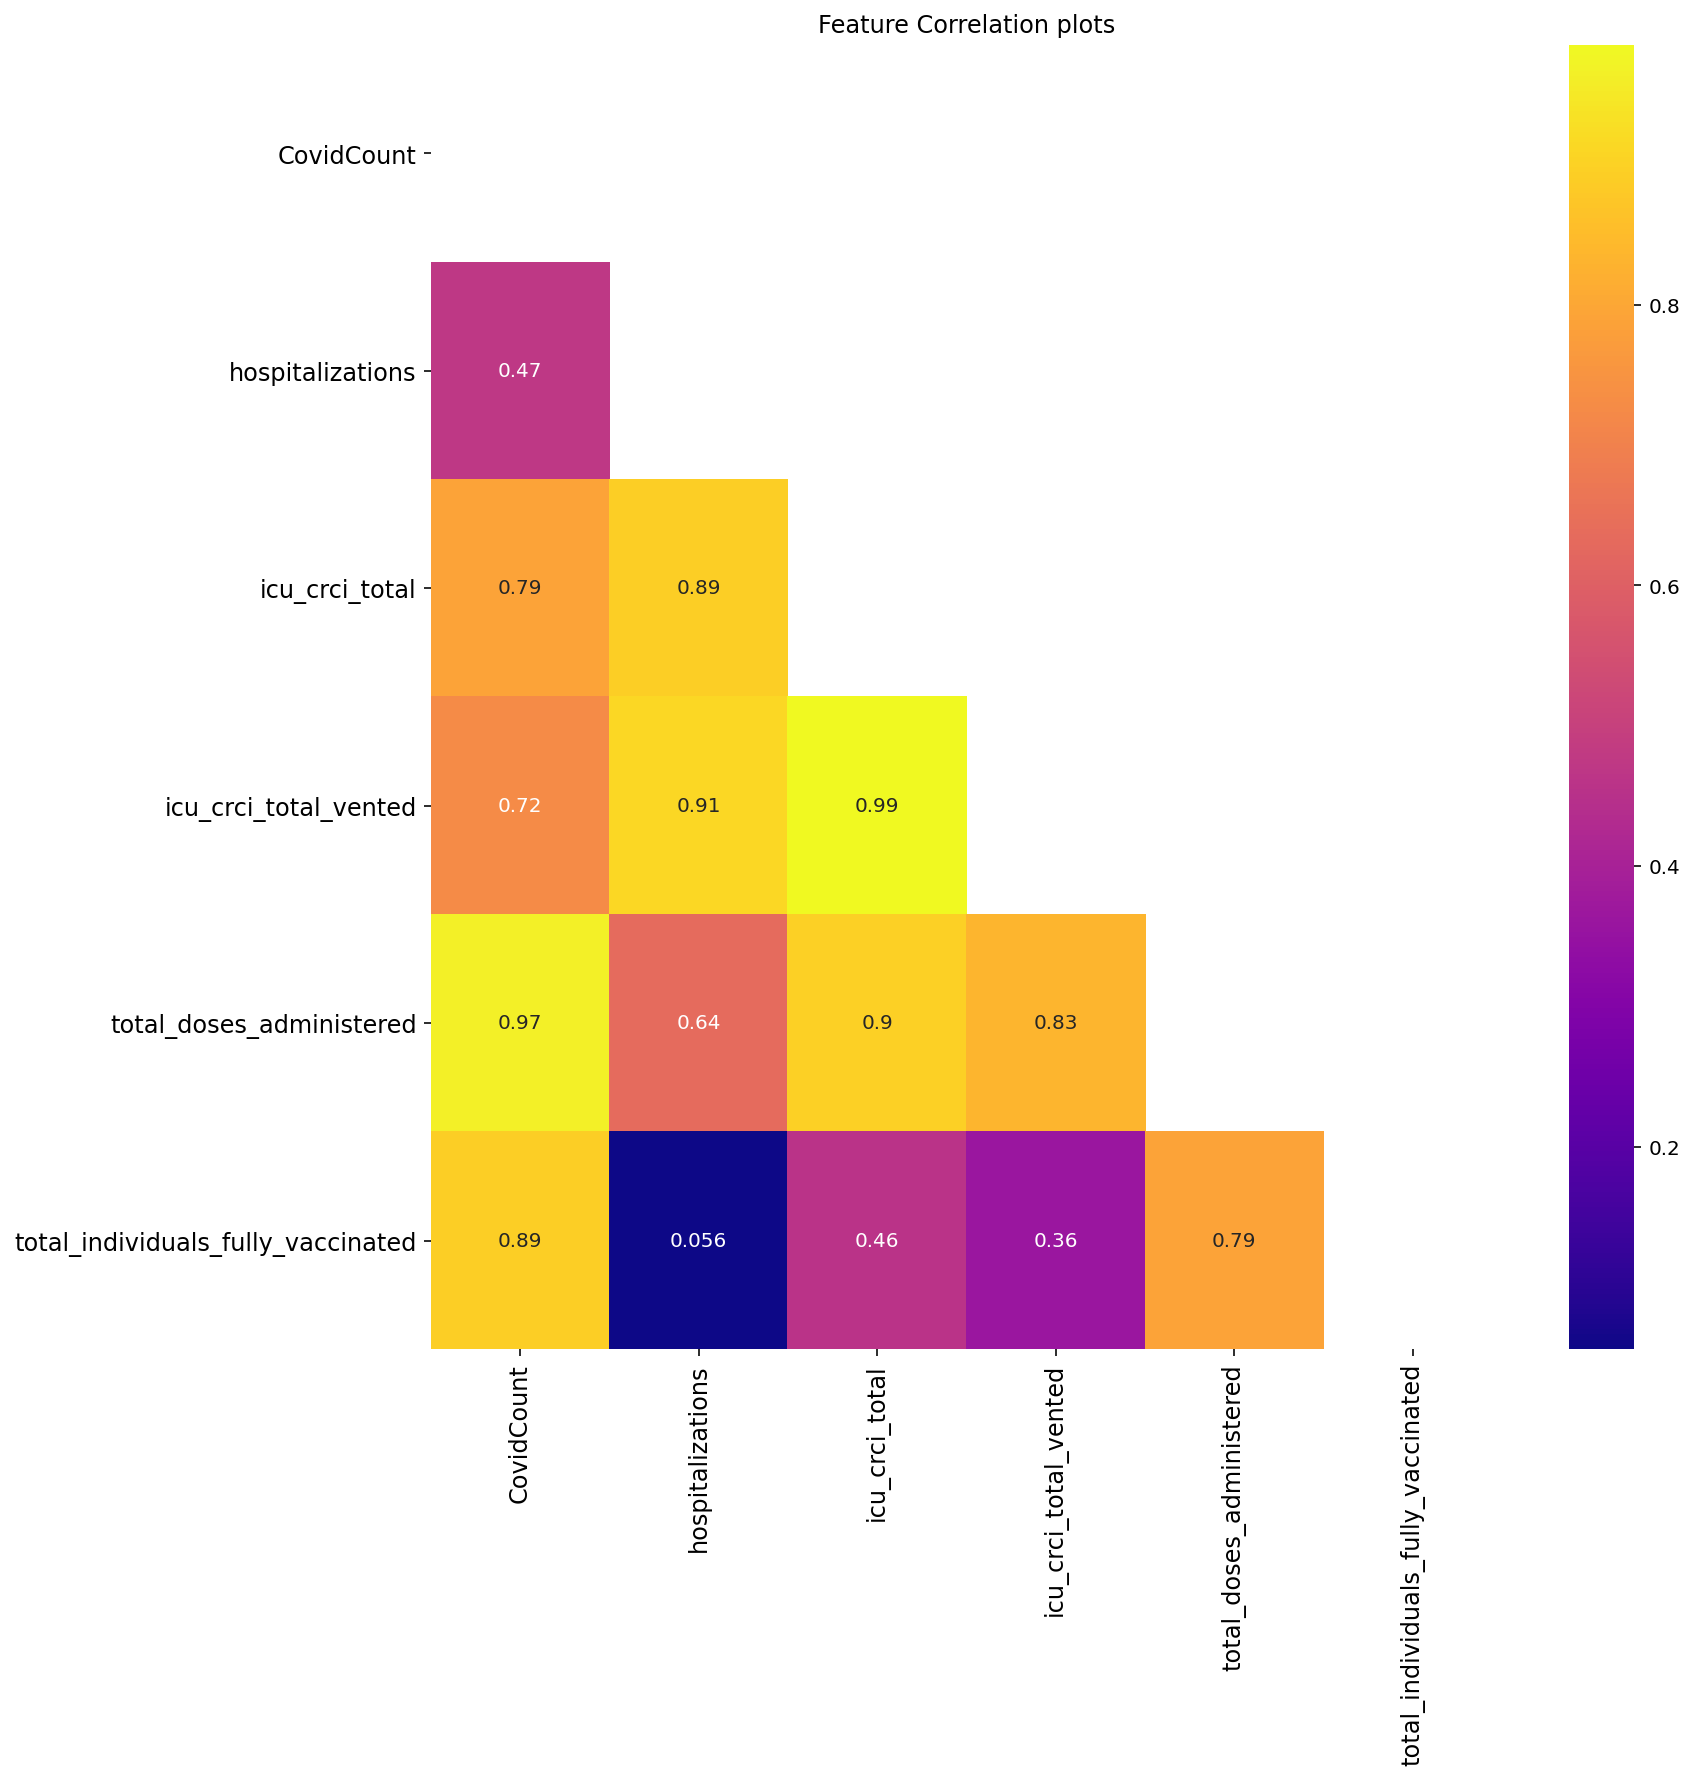

In [199]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),mask=np.triu(df.corr()),cmap='plasma',annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Feature Correlation plots')
# plt.savefig('model_data/correlation.png')
plt.show()

In [200]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=6
test = 'ssr_chi2test'
def grangers_causation_matrix(data,variables, test='ssr_chi2test', verbose=False):    
    """
    To check that coefficients of past values influences the present value
    
    Null hypothesis: The coefficients of past values in the times series are equal to zero 
    

   Response variableaa: rows, Predictors:columns
   The values in the table are the P-Values. P-Values lesser than the significance level (0.05), 
   implies the Null hypothesis that the coefficients of the corresponding past values is zero,
    that is, the X does not cause Y can be rejected.

    data      : dataframe containing the time series variables
    variables : names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,CovidCount_x,hospitalizations_x,icu_crci_total_x,icu_crci_total_vented_x,total_doses_administered_x,total_individuals_fully_vaccinated_x
CovidCount_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
hospitalizations_y,0.0000,1.0000,0.0000,0.0010,0.0000,0.0000
icu_crci_total_y,0.0000,0.0002,1.0000,0.0000,0.0000,0.0041
icu_crci_total_vented_y,0.0000,0.0000,0.0000,1.0000,0.0021,0.0007
total_doses_administered_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0001
total_individuals_fully_vaccinated_y,0.0012,0.0049,0.0749,0.0907,0.0150,1.0000


In [201]:
nobs = 3  #number of days to forecast 
n_past=60
df_train, df_test = df[-n_past:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(57, 6)
(3, 6)


In [202]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """
    Performing Augumented Dick-Fuller test to check Stationarity of given series and print report
    
    """
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-----------------------------------------------------')
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [33]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "CovidCount" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.0553
 No. Lags Chosen       = 8
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.7326. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4451
 No. Lags Chosen       = 7
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0095. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "icu_crci_total" 
    -----------------------------------------------------
 Null Hypothesis: Dat

In [203]:
# 1st difference since all series are non-stationary
df_differenced = df_train.diff().dropna()

In [204]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "CovidCount" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8209
 No. Lags Chosen       = 7
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.3701. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8566
 No. Lags Chosen       = 9
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.3527. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "icu_crci_total" 
    -----------------------------------------------------

In [205]:
#2nd differencing as some terms are still non-stationary 
df_differenced = df_differenced.diff().dropna()

In [206]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "CovidCount" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7136
 No. Lags Chosen       = 6
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.8432. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1448
 No. Lags Chosen       = 9
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.6969. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "icu_crci_total" 
    -----------------------------------------------------

In [207]:
#3rd differencing as some terms are still non-stationary 

df_differenced = df_differenced.diff().dropna()

In [208]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "CovidCount" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.0669
 No. Lags Chosen       = 5
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "hospitalizations" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.5662
 No. Lags Chosen       = 7
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "icu_crci_total" 
    -----------------------------------------------------
 Null Hypothesis: Data has unit root. Non-Station

In [209]:
model = VAR(df_differenced)
for i in range(1,6,1):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  65.04238792955445
BIC :  66.60375133274671
FPE :  1.784821945331912e+28
HQIC:  65.64281299061227 

Lag Order = 2
AIC :  64.44401005815088
BIC :  67.37087563602302
FPE :  1.0372585227891504e+28
HQIC:  65.56610124260175 

Lag Order = 3
AIC :  63.29727743265511
BIC :  67.6154759058036
FPE :  3.870747814206453e+27
HQIC:  64.94738878712843 

Lag Order = 4
AIC :  62.139688122668275
BIC :  67.87575713895271
FPE :  1.7534132972492485e+27
HQIC:  64.32401591999894 

Lag Order = 5
AIC :  60.146509522383894
BIC :  67.32770493970179
FPE :  5.141730163494285e+26
HQIC:  62.87104504694346 



C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [210]:
x=model.select_order(maxlags=6)
x.summary()

,AIC,BIC,FPE,HQIC
0,67.97,68.21,3.317e+29,68.06
1,65.40,67.04,2.566e+28,66.02
2,64.63,67.67,1.266e+28,65.77
3,63.35,67.79,4.273e+27,65.03
4,62.19,68.04,2.013e+27,64.40
5,59.65,66.90,3.496e+26,62.39
6,54.89*,63.54*,1.405e+25*,58.16*


In [211]:
fitted_model = model.fit(6)

In [212]:
fitted_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, May, 2021
Time:                     23:28:24
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    63.5406
Nobs:                     48.0000    HQIC:                   58.1568
Log likelihood:          -1503.93    FPE:                1.40523e+25
AIC:                      54.8863    Det(Omega_mle):     4.55703e+23
--------------------------------------------------------------------
Results for equation CovidCount
                                           coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------
const                                       -13.521086        39.313887           -0.344           0.731
L1.CovidCount                                -1.061894         0

In [213]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))


CovidCount : 1.23
hospitalizations : 1.48
icu_crci_total : 1.34
icu_crci_total_vented : 2.24
total_doses_administered : 1.09
total_individuals_fully_vaccinated : 1.68


In [214]:
lag_order = fitted_model.k_ar

lag_order

6

In [215]:
forecast_input = df_differenced.values[-lag_order:]
forecast_input

array([[ 5.9600e+02, -1.0600e+02, -3.0000e+00, -1.0000e+01,  7.2700e+02,
         1.7370e+03],
       [-7.8700e+02,  9.9000e+01,  7.0000e+00,  1.9000e+01, -6.1300e+03,
        -2.1820e+03],
       [ 1.9600e+02, -4.1000e+01,  0.0000e+00, -1.3000e+01, -1.9981e+04,
        -1.7040e+03],
       [ 6.6600e+02,  8.7000e+01,  5.0000e+00,  2.4000e+01, -3.0680e+03,
         1.2240e+03],
       [-5.5400e+02, -1.3900e+02, -3.6000e+01, -3.8000e+01,  5.5738e+04,
         1.3510e+03],
       [ 2.2000e+02,  4.0000e+00,  3.2000e+01,  5.7000e+01, -4.1570e+03,
         6.2100e+02]])

In [216]:
fc = fitted_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_3d')
df_forecast

,CovidCount_3d,hospitalizations_3d,icu_crci_total_3d,icu_crci_total_vented_3d,total_doses_administered_3d,total_individuals_fully_vaccinated_3d
report_date,,,,,,
2021-04-29,-344.003487,102.569888,46.291856,-95.704633,-4917.576947,-572.797040
2021-04-30,-138.229193,-70.487170,-104.745127,60.716563,27557.252204,-500.905608
2021-05-01,-623.064061,-141.609673,45.951368,39.144165,-84040.989535,-986.274070


In [217]:
def invert_transformation(df_train, df_forecast, third_diff=False,second_diff=False):
    """
    Transforming the forecast numbers to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back Differences
        if third_diff:
            df_fc[str(col)+'_2d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_3d'].cumsum()
            
            
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()       
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [218]:
df_results = invert_transformation(df_train, df_forecast, third_diff=True,second_diff=True)

In [219]:
df_results.columns

Index(['CovidCount_3d', 'hospitalizations_3d', 'icu_crci_total_3d',
       'icu_crci_total_vented_3d', 'total_doses_administered_3d',
       'total_individuals_fully_vaccinated_3d', 'CovidCount_2d',
       'CovidCount_1d', 'CovidCount_forecast', 'hospitalizations_2d',
       'hospitalizations_1d', 'hospitalizations_forecast', 'icu_crci_total_2d',
       'icu_crci_total_1d', 'icu_crci_total_forecast',
       'icu_crci_total_vented_2d', 'icu_crci_total_vented_1d',
       'icu_crci_total_vented_forecast', 'total_doses_administered_2d',
       'total_doses_administered_1d', 'total_doses_administered_forecast',
       'total_individuals_fully_vaccinated_2d',
       'total_individuals_fully_vaccinated_1d',
       'total_individuals_fully_vaccinated_forecast'],
      dtype='object')

In [220]:
df.columns

Index(['CovidCount', 'hospitalizations', 'icu_crci_total',
       'icu_crci_total_vented', 'total_doses_administered',
       'total_individuals_fully_vaccinated'],
      dtype='object')

In [221]:
df_forecasted = df_results[['CovidCount_forecast', 'hospitalizations_forecast', 'icu_crci_total_forecast',
       'icu_crci_total_vented_forecast', 'total_doses_administered_forecast',
       'total_individuals_fully_vaccinated_forecast']]

In [222]:
# df1_forecasted = df_results[['ICU_forecast','ICU_vented_forecast','hospitalizations_forecast','icu_crci_total_forecast','icu_crci_total_vented_forecast','total_individuals_fully_vaccinated_forecast','Cum_Covid_Numbers_forecast']]

In [223]:
#df1.tail(nobs)

df_forecasted

,CovidCount_forecast,hospitalizations_forecast,icu_crci_total_forecast,icu_crci_total_vented_forecast,total_doses_administered_forecast,total_individuals_fully_vaccinated_forecast
report_date,,,,,,
2021-04-29,277602.996513,2273.569888,927.291856,541.295367,5.134631e+06,369799.202960
2021-04-30,283520.760344,2243.222493,921.130440,458.602664,5.500873e+06,375961.703270
2021-05-01,290581.227434,2048.348143,904.467120,396.066056,5.921885e+06,382667.226862


In [224]:
df_test

,CovidCount,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
report_date,,,,,,
2021-04-29,275449,2248.0,884.0,620.0,5027770,368403.0
2021-04-30,277593,2201.0,883.0,632.0,5139984,371110.0
2021-05-01,278965,2152.0,900.0,637.0,5247684,373559.0


In [225]:
def accuracy_score(forecast,actual):
    '''
    Computes the error between the real and forecasted data 
    
    '''
    rmse = np.sqrt(np.mean((forecast - actual)**2))
    mape = 100 * np.mean(np.abs(forecast - actual)/np.abs(actual))
    merr = np.mean(np.abs(forecast - actual))
    
    return (np.round(mape,2),rmse, merr)

In [226]:
accuracy_score(df_test.iloc[:,1],df_forecasted.iloc[:,1].values)

(2.69, 66.28289235934545, 57.14807911626561)

In [227]:
mape =[]
rmse=[]
merr=[]

for i in range(len(df_test.columns)):
    score= accuracy_score(df_test.iloc[:,i],df_forecasted.iloc[:,i].values)
    mape.append(score[0])
    rmse.append(score[1])
    merr.append(score[2])
    
    
    

In [228]:
Score_chart_var =pd.DataFrame({'columns':df_test.columns, 'Mean_abs_pcnt_error %':mape, 'RMSE':rmse, 'Mean_Absolute_error':merr})

Score_chart_var

,columns,Mean_abs_pcnt_error %,RMSE,Mean_Absolute_error
0,CovidCount,2.29,7631.399685,6565.994764
1,hospitalizations,2.69,66.282892,57.148079
2,icu_crci_total,3.10,33.406937,28.629805
3,icu_crci_total_vented,37.73,177.304090,164.345304
4,total_doses_administered,6.68,445797.894710,380650.416603
5,total_individuals_fully_vaccinated,1.35,6012.437218,5118.711031


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization, LSTM, GRU, Embedding,Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping 

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [62]:
train_df = df_train.reset_index(drop=True)

In [63]:
dates = df_train.reset_index()

In [64]:
scaler = MinMaxScaler()

scaled_train_df = scaler.fit_transform(train_df)

In [65]:
train_df.head()

,CovidCount,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
0,115874,667.0,301.0,203.0,754419,266710.0
1,117070,647.0,306.0,198.0,784828,268118.0
2,118414,643.0,312.0,199.0,820714,269063.0
3,119600,625.0,312.0,198.0,860412,270625.0
4,120776,625.0,308.0,197.0,890604,271807.0


In [66]:
#train_df = df_train
n_forecast = nobs #days to forecast
n_past = 50

train_X=[]
train_Y = []

for i in range(n_past,len(train_df)+1 - n_forecast):
    train_X.append(scaled_train_df[i-n_past:i, 0:scaled_train_df.shape[1]])
    train_Y.append(scaled_train_df[i+n_forecast-1:i+n_forecast,0])

In [67]:
train_X,train_Y = np.array(train_X), np.array(train_Y)

In [68]:
train_X.shape 

(5, 50, 6)

In [69]:
train_Y.shape

(5, 1)

In [70]:
#Model 2: LSTM
early_stop = EarlyStopping(monitor='val_loss',patience=25,mode='min')

In [71]:
model = Sequential()
model.add(LSTM(100,activation='relu', input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True))
model.add(LSTM(100,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,activation='relu',return_sequences=False))
# model.add(LSTM(49,activation='relu',return_sequences=True))
# #model.add(GRU(49,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
# model.add(LSTM(21,activation='relu',return_sequences=True))
# #model.add(Dropout(0.2))
# model.add(LSTM(7,activation='relu',return_sequences=False))
# #model.add(Dropout(0.2))
model.add(Dense(21,activation='relu'))
model.add(Dense(train_Y.shape[1]))
model.compile(optimizer='adam',loss='mse')

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 100)           42800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 100)           80400     
_________________________________________________________________
dropout (Dropout)            (None, 50, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 21)                2121      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [73]:
history = model.fit(train_X,train_Y,epochs=200,batch_size=8, validation_split=0.15, verbose=1,callbacks=[early_stop])

Epoch 1/200
1/1 [==============================] - 0s 356ms/step - loss: 0.9242 - val_loss: 0.9409
Epoch 2/200
1/1 [==============================] - 0s 15ms/step - loss: 0.8729 - val_loss: 0.8834
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 0.8225 - val_loss: 0.8181
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 0.7606 - val_loss: 0.7412
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6924 - val_loss: 0.6383
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6064 - val_loss: 0.4999
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 0.4757 - val_loss: 0.3140
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.3271 - val_loss: 0.0917
Epoch 9/200
1/1 [==============================] - 0s 13ms/step - loss: 0.1017 - val_loss: 0.0583
Epoch 10/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0643 - val_loss: 0.2797
Epoch 11/200
1/1 [

<AxesSubplot:>

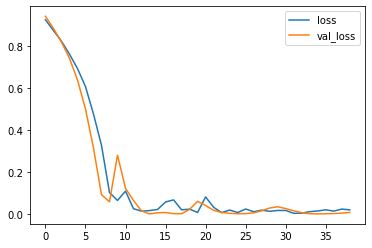

In [74]:
losses= pd.DataFrame(history.history)
losses.plot()

In [75]:
forecast = model.predict(train_X[-n_forecast:])





In [76]:
forecast = model.predict(train_X[-n_forecast:])


In [77]:
forecast

array([[0.96867996],
       [1.0259018 ],
       [1.0861316 ]], dtype=float32)

In [81]:
def Model_forecast(model):
    '''
    Takes a model and uses it to make a forecast
    
    '''
    forecast = model.predict(train_X[-n_forecast:])
    df_forecast = forecaster(forecast)
    df_forecast.columns = df_test.reset_index().columns
    df_forecast['report_date']= pd.to_datetime(df_forecast['report_date'])
    return df_forecast

In [82]:
model1_forecast = Model_forecast(model)

In [83]:
forecast

array([[0.96867996],
       [1.0259018 ],
       [1.0861316 ]], dtype=float32)

In [84]:
model1_forecast

,report_date,CovidCount,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
0,2021-04-29,268515.68750,2312.440674,858.959656,592.033508,4777137.5,362082.37500
1,2021-04-30,277532.53125,2412.120850,891.919434,615.723389,5014768.0,367716.18750
2,2021-05-01,287023.37500,2517.041260,926.611755,640.658508,5264889.0,373646.15625


In [85]:
df_test

,CovidCount,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
report_date,,,,,,
2021-04-29,275449,2248.0,884.0,620.0,5027770,368403.0
2021-04-30,277593,2201.0,883.0,632.0,5139984,371110.0
2021-05-01,278965,2152.0,900.0,637.0,5247684,373559.0


In [86]:
mape =[]
rmse=[]
merr=[]

for i in range(1,len(df_test.reset_index().columns)):
    score= accuracy_score(df_test.reset_index().iloc[:,i],model1_forecast.iloc[:,i].values)
    mape.append(score[0])
    rmse.append(score[1])
    merr.append(score[2])
    

In [87]:
Score_chart_lstm =pd.DataFrame({'columns':df_test.columns, 'Mean_abs_pcnt_error %':mape, 'RMSE':rmse, 'Mean_Absolute_error':merr})

Score_chart_lstm

,columns,Mean_abs_pcnt_error %,RMSE,Mean_Absolute_error
0,CovidCount,1.80,6137.640327,5017.385417
1,hospitalizations,8.68,246.292330,213.534261
2,icu_crci_total,2.26,21.716051,20.190511
3,icu_crci_total_vented,2.65,18.801041,15.967204
4,total_doses_administered,2.69,162061.417100,131017.833333
5,total_individuals_fully_vaccinated,0.90,4142.296460,3267.197917


In [88]:
model = Sequential()
model.add(Conv1D(64,activation='relu',kernel_size=(3),input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(MaxPooling1D(pool_size=3,padding='same'))
#model.add(Dropout(0.25))
model.add(Conv1D(32,activation='relu',kernel_size=(3)))
model.add(MaxPooling1D(pool_size=3,padding='same'))
#model.add(Dropout(0.25))
model.add(LSTM(64,activation='relu',return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(LSTM(16,activation='relu',return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(8,activation='relu',return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(21,activation='relu'))
model.add(Dense(train_Y.shape[1]))
model.compile(optimizer='adam',loss='mse')

In [89]:
history = model.fit(train_X,train_Y,epochs=500,batch_size=8, validation_split=0.15, verbose=1,callbacks=[early_stop])

Epoch 1/500
1/1 [==============================] - 0s 450ms/step - loss: 0.9270 - val_loss: 0.9956
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9230 - val_loss: 0.9900
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 0.9176 - val_loss: 0.9836
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9114 - val_loss: 0.9769
Epoch 5/500
1/1 [==============================] - 0s 251ms/step - loss: 0.9050 - val_loss: 0.9698
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8983 - val_loss: 0.9626
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8915 - val_loss: 0.9552
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8844 - val_loss: 0.9474
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8770 - val_loss: 0.9395
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8694 - val_loss: 0.9312
Epoch 11/500
1/1 [

<AxesSubplot:>

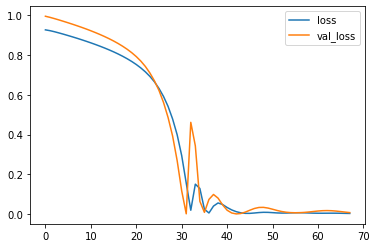

In [90]:
losses= pd.DataFrame(history.history)
losses.plot()

In [91]:
model2_forecast = Model_forecast(model)

In [92]:
mape =[]
rmse=[]
merr=[]

for i in range(1,len(df_test.reset_index().columns)):
    score= accuracy_score(df_test.reset_index().iloc[:,i],model2_forecast.iloc[:,i].values)
    mape.append(score[0])
    rmse.append(score[1])
    merr.append(score[2])

In [93]:
Score_chart_cnnlstm_1 =pd.DataFrame({'columns':df_test.columns, 'Mean_abs_pcnt_error %':mape, 'RMSE':rmse, 'Mean_Absolute_error':merr})

Score_chart_cnnlstm_1

,columns,Mean_abs_pcnt_error %,RMSE,Mean_Absolute_error
0,CovidCount,1.56,4888.811260,4397.177083
1,hospitalizations,9.66,258.466669,237.863688
2,icu_crci_total,1.99,19.068690,18.070780
3,icu_crci_total_vented,1.48,10.960243,9.058879
4,total_doses_administered,1.25,85151.496838,61721.333333
5,total_individuals_fully_vaccinated,0.50,2314.177789,1834.020833


In [94]:
model = Sequential()
model.add(Conv1D(64,activation='relu',kernel_size=(3),input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(MaxPooling1D(pool_size=3,padding='same'))
#model.add(Dropout(0.15))
model.add(Conv1D(32,activation='relu',kernel_size=(3)))
model.add(MaxPooling1D(pool_size=3,padding='same'))
#model.add(Dropout(0.25))
model.add(LSTM(100,activation='relu',return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(100,activation='relu',return_sequences=True))
model.add(LSTM(100,activation='relu',return_sequences=False))
#model.add(Dropout(0.2))
#model.add(LSTM(8,activation='relu',return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(21,activation='relu'))
model.add(Dense(train_Y.shape[1]))
model.compile(optimizer='adam',loss='mse')

In [95]:
history = model.fit(train_X,train_Y,epochs=200,batch_size=8, validation_split=0.15, verbose=1,callbacks=[early_stop])

Epoch 1/200
1/1 [==============================] - 1s 743ms/step - loss: 0.9292 - val_loss: 0.9888
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 0.9167 - val_loss: 0.9756
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 0.9045 - val_loss: 0.9611
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 0.8910 - val_loss: 0.9445
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 0.8754 - val_loss: 0.9254
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 0.8577 - val_loss: 0.9034
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 0.8375 - val_loss: 0.8779
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 0.8142 - val_loss: 0.8480
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 0.7871 - val_loss: 0.8126
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 0.7551 - val_loss: 0.7705
Epoch 11/200
1/1 [==

<AxesSubplot:>

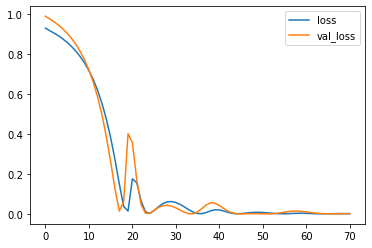

In [96]:
losses= pd.DataFrame(history.history)
losses.plot()

In [97]:
model3_forecast = Model_forecast(model)

In [98]:
mape =[]
rmse=[]
merr=[]

for i in range(1,len(df_test.reset_index().columns)):
    score= accuracy_score(df_test.reset_index().iloc[:,i],model1_forecast.iloc[:,i].values)
    mape.append(score[0])
    rmse.append(score[1])
    merr.append(score[2])

In [99]:
model3_forecast

,report_date,CovidCount,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
0,2021-04-29,267367.25000,2299.744629,854.761719,589.016235,4746871.5,361364.78125
1,2021-04-30,273305.65625,2365.393311,876.468750,604.618164,4903373.0,365075.18750
2,2021-05-01,279405.65625,2432.828125,898.766357,620.644592,5064132.0,368886.53125


In [100]:
#df_train

In [101]:
Score_chart_cnn_lstm2 =pd.DataFrame({'columns':df_test.columns, 'Mean_abs_pcnt_error %':mape, 'RMSE':rmse, 'Mean_Absolute_error':merr})

Score_chart_cnn_lstm2

,columns,Mean_abs_pcnt_error %,RMSE,Mean_Absolute_error
0,CovidCount,1.80,6137.640327,5017.385417
1,hospitalizations,8.68,246.292330,213.534261
2,icu_crci_total,2.26,21.716051,20.190511
3,icu_crci_total_vented,2.65,18.801041,15.967204
4,total_doses_administered,2.69,162061.417100,131017.833333
5,total_individuals_fully_vaccinated,0.90,4142.296460,3267.197917


In [102]:
pd.concat([Score_chart_var,Score_chart_lstm,Score_chart_cnnlstm_1,Score_chart_cnn_lstm2],axis=1)

,columns,Mean_abs_pcnt_error %,RMSE,Mean_Absolute_error,columns,Mean_abs_pcnt_error %,RMSE,Mean_Absolute_error,columns,Mean_abs_pcnt_error %,RMSE,Mean_Absolute_error,columns,Mean_abs_pcnt_error %,RMSE,Mean_Absolute_error
0,CovidCount,2.29,7631.399685,6565.994764,CovidCount,1.80,6137.640327,5017.385417,CovidCount,1.56,4888.811260,4397.177083,CovidCount,1.80,6137.640327,5017.385417
1,hospitalizations,2.69,66.282892,57.148079,hospitalizations,8.68,246.292330,213.534261,hospitalizations,9.66,258.466669,237.863688,hospitalizations,8.68,246.292330,213.534261
2,icu_crci_total,3.10,33.406937,28.629805,icu_crci_total,2.26,21.716051,20.190511,icu_crci_total,1.99,19.068690,18.070780,icu_crci_total,2.26,21.716051,20.190511
3,icu_crci_total_vented,37.73,177.304090,164.345304,icu_crci_total_vented,2.65,18.801041,15.967204,icu_crci_total_vented,1.48,10.960243,9.058879,icu_crci_total_vented,2.65,18.801041,15.967204
4,total_doses_administered,6.68,445797.894710,380650.416603,total_doses_administered,2.69,162061.417100,131017.833333,total_doses_administered,1.25,85151.496838,61721.333333,total_doses_administered,2.69,162061.417100,131017.833333
5,total_individuals_fully_vaccinated,1.35,6012.437218,5118.711031,total_individuals_fully_vaccinated,0.90,4142.296460,3267.197917,total_individuals_fully_vaccinated,0.50,2314.177789,1834.020833,total_individuals_fully_vaccinated,0.90,4142.296460,3267.197917


In [103]:
Models = ['VARIMA','LSTM','CNNLSTM_1','CNNLSTM_2']
CovidCount_error = [Score_chart_var['Mean_abs_pcnt_error %'][0],Score_chart_lstm['Mean_abs_pcnt_error %'][0],Score_chart_cnnlstm_1['Mean_abs_pcnt_error %'][0],Score_chart_cnn_lstm2['Mean_abs_pcnt_error %'][0]]
Hospitalization_error = [Score_chart_var['Mean_abs_pcnt_error %'][1],Score_chart_lstm['Mean_abs_pcnt_error %'][1],Score_chart_cnnlstm_1['Mean_abs_pcnt_error %'][1],Score_chart_cnn_lstm2['Mean_abs_pcnt_error %'][1]]
ICU_CRCI_VENT_error = [Score_chart_var['Mean_abs_pcnt_error %'][3],Score_chart_lstm['Mean_abs_pcnt_error %'][3],Score_chart_cnnlstm_1['Mean_abs_pcnt_error %'][3],Score_chart_cnn_lstm2['Mean_abs_pcnt_error %'][3]]
Vaccine_Doses_error = [Score_chart_var['Mean_abs_pcnt_error %'][4],Score_chart_lstm['Mean_abs_pcnt_error %'][4],Score_chart_cnnlstm_1['Mean_abs_pcnt_error %'][4],Score_chart_cnn_lstm2['Mean_abs_pcnt_error %'][4]]


In [104]:
dt_labels= pd.DataFrame({'models':Models, 'Covidforecast' : CovidCount_error, 'Hospitalization': Hospitalization_error, 'ICU_Ventilators': ICU_CRCI_VENT_error, 'Vaccine Doses': Vaccine_Doses_error})

In [105]:
dt_labels

,models,Covidforecast,Hospitalization,ICU_Ventilators,Vaccine Doses
0,VARIMA,2.29,2.69,37.73,6.68
1,LSTM,1.80,8.68,2.65,2.69
2,CNNLSTM_1,1.56,9.66,1.48,1.25
3,CNNLSTM_2,1.80,8.68,2.65,2.69


In [106]:
dt_labels = pd.melt(dt_labels, id_vars="models", var_name="Features", value_name="Error_Values")

In [107]:
dt_labels

,models,Features,Error_Values
0,VARIMA,Covidforecast,2.29
1,LSTM,Covidforecast,1.80
2,CNNLSTM_1,Covidforecast,1.56
3,CNNLSTM_2,Covidforecast,1.80
4,VARIMA,Hospitalization,2.69
5,LSTM,Hospitalization,8.68
6,CNNLSTM_1,Hospitalization,9.66
7,CNNLSTM_2,Hospitalization,8.68
8,VARIMA,ICU_Ventilators,37.73
9,LSTM,ICU_Ventilators,2.65


In [108]:
dt_labels[dt_labels['Features']=='Hospitalization']

,models,Features,Error_Values
4,VARIMA,Hospitalization,2.69
5,LSTM,Hospitalization,8.68
6,CNNLSTM_1,Hospitalization,9.66
7,CNNLSTM_2,Hospitalization,8.68


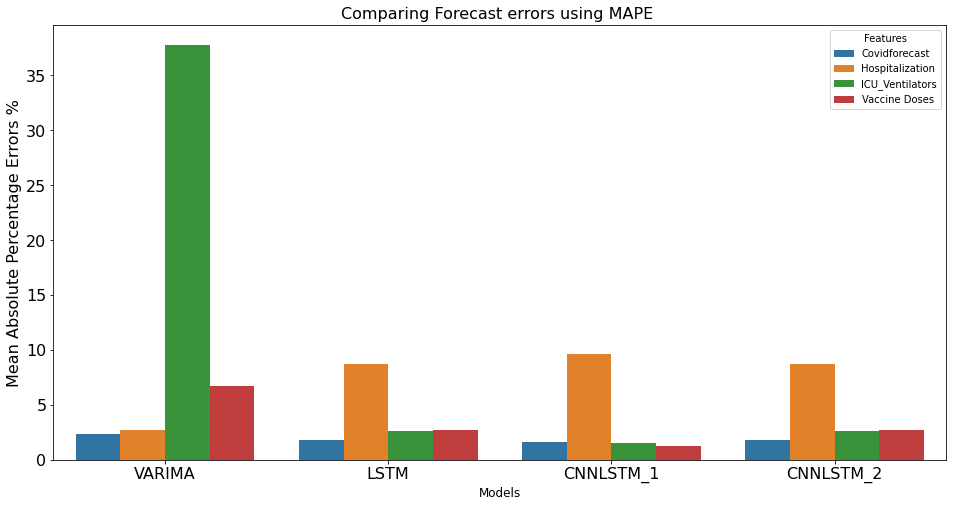

In [109]:
plt.figure(figsize=(16,8))
sns.barplot(x='models', y='Error_Values',hue='Features', data=dt_labels)
#sns.barplot(x=Models,y=CovidCount_error,label='Covid Numbers')
#sns.barplot(x=Models,y=Hospitalization_error,label='Hospitalization')
# sns.lineplot(x=Models,y=ICU_CRCI_VENT_error,marker='o',label='ICU_VENT_Covid')
# sns.lineplot(x=Models,y=Vaccine_Doses_error,marker='o',label='Vaccine_Doses_Administered')
plt.xlabel('Models',fontsize=12)
plt.ylabel('Mean Absolute Percentage Errors %',fontsize=16)
plt.title('Comparing Forecast errors using MAPE ',fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.savefig('model_data/errors3.png',facecolor='white')
plt.show()

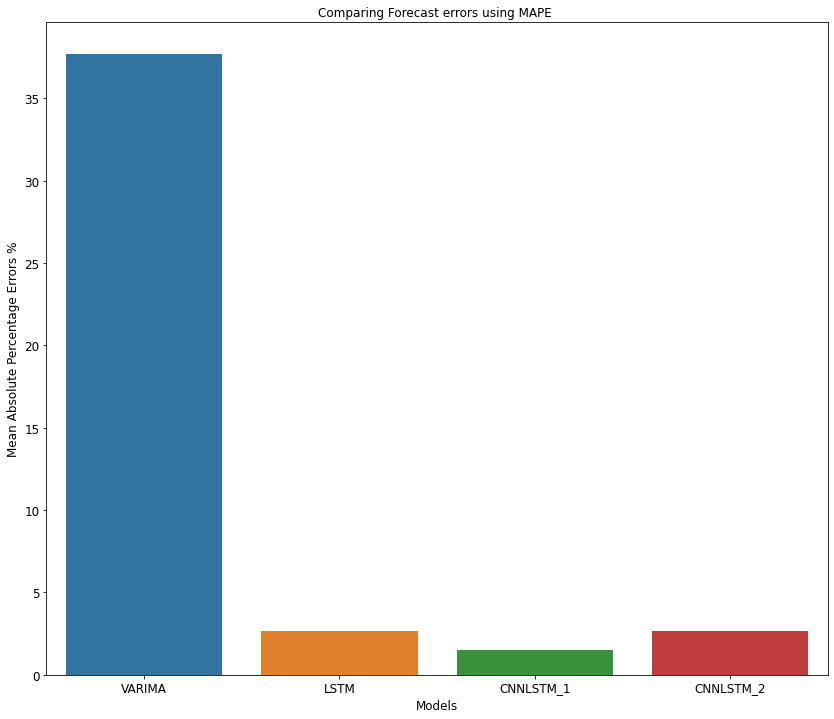

In [110]:
plt.figure(figsize=(14,12))
sns.barplot(x='models', y='Error_Values', data=dt_labels[dt_labels['Features']=='ICU_Ventilators'])
#sns.barplot(x=Models,y=CovidCount_error,label='Covid Numbers')
#sns.barplot(x=Models,y=Hospitalization_error,label='Hospitalization')
# sns.lineplot(x=Models,y=ICU_CRCI_VENT_error,marker='o',label='ICU_VENT_Covid')
# sns.lineplot(x=Models,y=Vaccine_Doses_error,marker='o',label='Vaccine_Doses_Administered')
plt.xlabel('Models',fontsize=12)
plt.ylabel('Mean Absolute Percentage Errors %',fontsize=12)
plt.title('Comparing Forecast errors using MAPE ',fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig('model_data/errors3.png',facecolor='white')
plt.show()

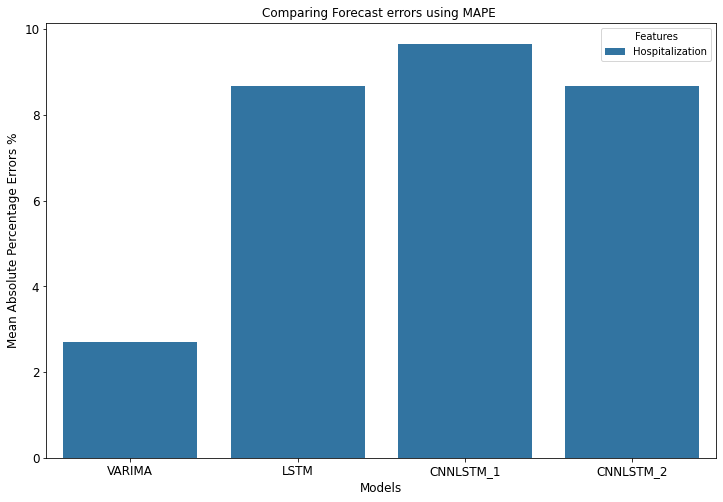

In [111]:
plt.figure(figsize=(12,8))
sns.barplot(x='models', y='Error_Values', hue='Features', data=dt_labels[dt_labels['Features']=='Hospitalization'])
#sns.barplot(x=Models,y=CovidCount_error,label='Covid Numbers')
#sns.barplot(x=Models,y=Hospitalization_error,label='Hospitalization')
# sns.lineplot(x=Models,y=ICU_CRCI_VENT_error,marker='o',label='ICU_VENT_Covid')
# sns.lineplot(x=Models,y=Vaccine_Doses_error,marker='o',label='Vaccine_Doses_Administered')
plt.xlabel('Models',fontsize=12)
plt.ylabel('Mean Absolute Percentage Errors %',fontsize=12)
plt.title('Comparing Forecast errors using MAPE ',fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig('model_data/errors2.png')
plt.show()

In [112]:
# plt.figure(figsize=(12,8))
# ax = plt.subplot(111)
# ax.bar(x=Models,y=CovidCount_error,width=0.2,height= 1, label='Covid Numbers',align='center')
# #ax.bar(x=Models,y=Hospitalization_error,width=0.2,label='Hospitalization')
# # sns.lineplot(x=Models,y=ICU_CRCI_VENT_error,marker='o',label='ICU_VENT_Covid')
# # sns.lineplot(x=Models,y=Vaccine_Doses_error,marker='o',label='Vaccine_Doses_Administered')
# plt.xlabel('Forecasting Models',fontsize=12)
# plt.ylabel('Mean Absolute Percentage Errors %',fontsize=12)
# plt.title('Comparing Forecast errors using MAPE ',fontsize=12)
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=12)
# plt.savefig('model_data/errors.png')
# plt.show()


# ax.bar(x-0.2, y, width=0.2, color='b', align='center')
# ax.bar(x, z, width=0.2, color='g', align='center')
# ax.bar(x+0.2, k, width=0.2, color='r', align='center')
# ax.xaxis_date()

plt.show()

In [113]:
df_train[-30:]

,CovidCount,hospitalizations,icu_crci_total,icu_crci_total_vented,total_doses_administered,total_individuals_fully_vaccinated
report_date,,,,,,
2021-03-30,167570,1093.0,411.0,257.0,2102380,313889.0
2021-03-31,170638,1117.0,424.0,261.0,2192253,315820.0
2021-04-01,174409,1123.0,433.0,259.0,2276313,317715.0
2021-04-02,177762,1168.0,435.0,271.0,2364496,320350.0
2021-04-03,181120,1160.0,451.0,261.0,2424063,321469.0
2021-04-04,184568,1241.0,476.0,262.0,2493188,322048.0
2021-04-05,189211,1328.0,494.0,293.0,2545640,322197.0
2021-04-06,193864,1397.0,510.0,310.0,2621839,323148.0
2021-04-07,198561,1469.0,504.0,311.0,2726221,324783.0


In [114]:
# df_forecasted = df_forecasted.reset_index()
# df_forecasted['reset']
%config InlineBackend.figure_format = 'retina'

In [115]:
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib as mpl
mpl.rc("savefig", dpi=300)

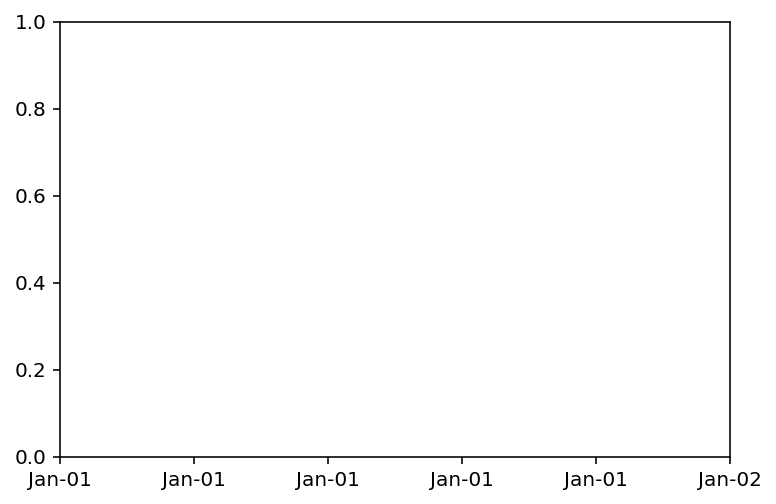

In [116]:
dtFmt = mdates.DateFormatter('%b-%d') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt)

NameError: name 'ab' is not defined

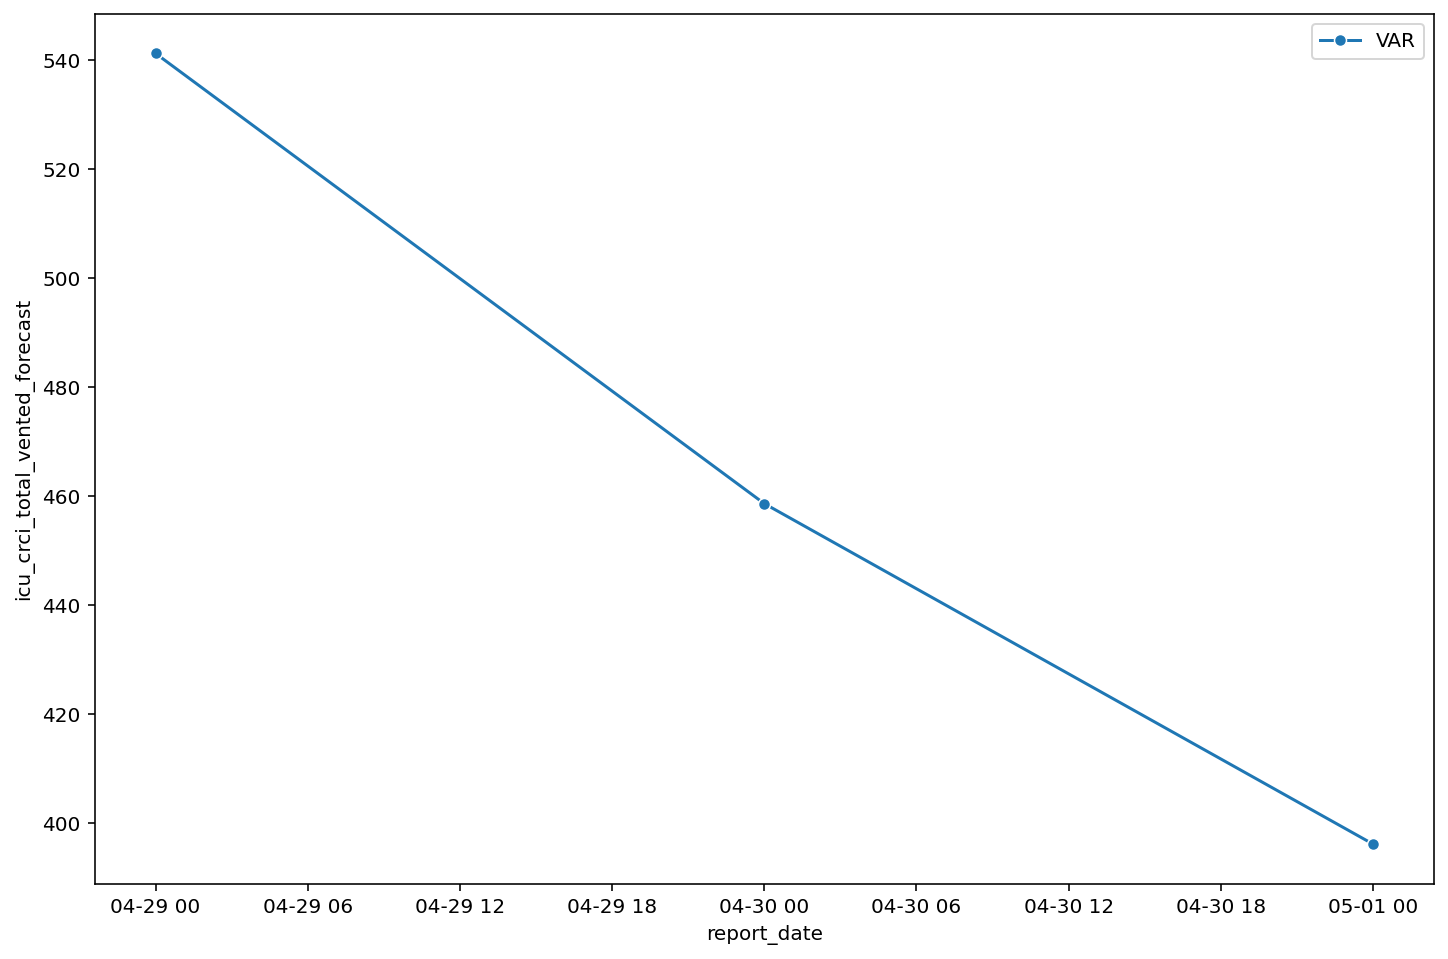

In [117]:
plt.figure(figsize=(12,8))
sns.lineplot(x='report_date',y='icu_crci_total_vented_forecast',data=df_forecasted,marker='o',label='VAR')
sns.lineplot(x='report_date',y='icu_crci_total_vented',data=ab,marker='o',label='LSTM' )
sns.lineplot(x='report_date',y='icu_crci_total_vented',data=model2_forecast,marker='o',label='LSTM-CNN')
sns.lineplot(x='report_date',y='icu_crci_total_vented',data=model3_forecast,marker='o',label='LSTM-CNN_100')
sns.lineplot(x=df_test.index,y='icu_crci_total_vented',data=df_test,color='black', marker='o' )
sns.lineplot(x='report_date',y='icu_crci_total_vented',data=df[-34:],color='black',marker='o',label='Real data' )
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Patients in ICU on Ventilator due to COVID related illness',fontsize=12)
plt.title('Forecasting Daily Number of patients in need of  ICU_Ventilators ',fontsize=12)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.savefig('model_data/Forecast2.png')
plt.show()

In [ ]:
plt.figure(figsize=(14,12))
sns.lineplot(x='report_date',y='hospitalizations',data=model1_forecast,marker='o',color='red',label='LSTM' )
sns.lineplot(x='report_date',y='hospitalizations',data=model2_forecast,marker='o',color='green',label='LSTMCNN_1')
sns.lineplot(x='report_date',y='hospitalizations',data=model3_forecast,marker='o',color='blue',label='LSTMCNN_2')
sns.lineplot(x='report_date',y='hospitalizations_forecast',data=df_forecasted,marker='o',color='orange',label='VAR')
sns.lineplot(x=df_test.index,y='hospitalizations',data=df_test,color='black',marker='o' )
sns.lineplot(x='report_date',y='hospitalizations',data=df[-31:],color='black',marker='o',label='Real data')
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Daily Hospitalization due to Covid',fontsize=14)
plt.title('Forecasting Daily Covid related Hospitalization',fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.savefig('model_data/Forecast1.png')
plt.show()

In [ ]:
d1 = model1_forecast.copy()
d1= d1.set_index('report_date')

In [ ]:
d2 = model2_forecast.copy()
d2= d2.set_index('report_date')
ab2 = pd.concat([df_train[-31:],d2], axis=0)

In [ ]:
d3 = model3_forecast.copy()
d3= d3.set_index('report_date')
ab3 = pd.concat([df_train[-31:],d3], axis=0)

In [ ]:
d4 = df_forecasted.copy()

d4.columns = df_test.columns

ab4 = pd.concat([df_train[-31:],d4], axis=0)

In [ ]:
ab4 

In [ ]:
 ab = pd.concat([df_train[-31:],d1], axis=0)

In [ ]:
plt.figure(figsize=(14,12))
sns.lineplot(x='report_date',y='icu_crci_total_vented',data=ab4,marker='o',label='VAR')
sns.lineplot(x='report_date',y='icu_crci_total_vented',data=ab,marker='o',label='LSTM' )
sns.lineplot(x='report_date',y='icu_crci_total_vented',data=ab2,marker='o',label='LSTMCNN_1')
sns.lineplot(x='report_date',y='icu_crci_total_vented',data=ab3,marker='o',label='LSTMCNN_2')
sns.lineplot(x=df_test.index,y='icu_crci_total_vented',data=df_test,color='black', marker='o' )
sns.lineplot(x='report_date',y='icu_crci_total_vented',data=df[-34:],color='black',marker='o',label='Real data' )
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Patients in ICU on Ventilator due to COVID related illness',fontsize=12)
plt.title('Forecasting Daily Number of patients in need of  ICU_Ventilators ',fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.axvline(x='2021-04-28 00:00:00',color='blue')
plt.gca().annotate('Forecasts', xy=('2021-04-28 00:00:00', 450), xytext=('2021-04-23 00:00:00', 400),
            weight='bold', color='black',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color='blue'))
plt.gcf().patch.set_facecolor('white')
#plt.gcf().gca().add_artist(circle(3.0, 3))
plt.savefig('model_data/Forecast2.png',facecolor='white')
plt.show()

In [ ]:
plt.figure(figsize=(14,12))
sns.lineplot(x='report_date',y='hospitalizations',data=ab4,marker='o',label='VARIMA')
sns.lineplot(x='report_date',y='hospitalizations',data=ab,marker='o',label='LSTM' )
sns.lineplot(x='report_date',y='hospitalizations',data=ab2,marker='o',label='LSTMCNN_1')
sns.lineplot(x='report_date',y='hospitalizations',data=ab3,marker='o',label='LSTMCNN_2')
sns.lineplot(x=df_test.index,y='hospitalizations',data=df_test,color='black',marker='o' )
sns.lineplot(x='report_date',y='hospitalizations',data=df[-34:],color='black',marker='o',label='Real data')
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Daily Hospitalization due to Covid',fontsize=14)
plt.title('Forecasting Daily Covid related Hospitalization',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.axvline(x='2021-04-28 00:00:00',color='blue')
plt.gca().annotate('Forecasts', xy=('2021-04-28 00:00:00', 1800), xytext=('2021-04-23 00:00:00', 1500),
            weight='bold', color='black',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color='blue'))
plt.savefig('model_data/Forecast1.png',facecolor='white')
plt.show()

In [ ]:
#df_train

In [ ]:
#df_reg  = df1.merge(df2,left_on='Accurate_Episode_Date', right_on='report_date', how='inner')

In [ ]:
#df_reg 